# MOVIE DATA ANALYSIS

## Overview and Business Understanding 

our company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## Business understanding

our company wants to enter the movie production business but lacks industry experience. Your role is to analyze current market trends to guide their strategy.


### Challenges encountered

(1). Inconsistent data(data quality).

(2). large datasets 

(3). 

### Proposed Solution

(a). Clean and merge datasets to ensure reliability.

(b). Focus on 2008–2023 data to capture recent trends.

(c). Prioritize genres with high profit margins (e.g., action, animation) and directors with consistent hits.

(d). Use visualizations (e.g., histogram,bar charts) to communicate findings effectively.

### Brief Conclusion
By analyzing historical data, we can recommend data-driven strategies for the studio’s launch, minimizing risk while maximizing profitability. Key focus areas include genre selection, director partnerships, and audience targeting.

### Problem Statement
The company seeks to establish a new movie studio but lacks insights into what types of films resonate with audiences and generate revenue. Without understanding trends in genre profitability, director performance, or audience demographics, the studio risks investing in projects that may underperform. The challenge is to derive actionable insights from existing data to guide decision-making and ensure a competitive entry into the market.

### objectives

 (i). Finding the Best Performing Movie Genre in the Last 15 Years
 
 (ii). Finding the Best perfoming Director in movies in the last 15 years

 (iii). Identifying the Best Performing Age Audience in the Last 15 Years 
       
       > loading the dataset to work with
       
       > cleaning the dataset
       
       > filtering the most performing recent movies to work with

       > merging the datasets used

       > visualizations

       > hypothesis testing

#### hypothesis

(i). What are the top 5 highest-grossing movie genres in the past 15 years?

(ii). Which director has the most films in the top 10 highest-grossing films of the last 15 years?

(iii). How have age-targeted films (e.g., animated movies, etc.) performed commercially in the last 15 years?

## Data Understanding 

Import necessary libraries for analysis.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sqlite3
import os
import gzip
import shutil
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols 

In [54]:
# Path to your zipped data folder (from screenshot)
zipped_folder = r"C:\Users\HP\OneDrive\Desktop\MYPROJECT\zipped data"

# Files to unzip (from your screenshot)
files_to_unzip = [
    "rt.movie_info.tsv.gz",
    "tmdb.movies.csv.gz",
    "tn.movie_budgets.csv.gz"
]

for gz_file in files_to_unzip:
    # Full path to compressed file
    gz_path = os.path.join(zipped_folder, gz_file)
    
    # Remove .gz extension for output file
    output_file = os.path.join(zipped_folder, gz_file[:-3])  # removes last 3 chars (.gz)
    
  

In [55]:
data_folder = r"C:\Users\HP\OneDrive\Desktop\MYPROJECT\zipped data"

### i loading the numbers dataset

In [56]:
# Load the datasets
tn_movies = pd.read_csv(
        os.path.join(data_folder, "tn.movie_budgets.csv"),
        encoding='utf-8'
    )
tn_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [57]:
tn_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [58]:
tn_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [59]:
# First, let's create a clean copy of the dataframe
clean_movies = tn_movies.copy()

In [60]:
#change monetary columns (remove $ and commas, convert to numeric)
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in money_cols:
    clean_movies[col] = (clean_movies[col]
                         .str.replace('$', '')
                         .str.replace(',', '')
                         .astype(float))
clean_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [61]:
# Convert release_date to datetime
clean_movies['release_date'] = pd.to_datetime(clean_movies['release_date'])
clean_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [62]:
# handling mising va;lues
clean_movies['domestic_gross'] = clean_movies['domestic_gross'].fillna(0)
clean_movies['worldwide_gross'] = clean_movies['worldwide_gross'].fillna(0)
clean_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [63]:
#calculate profit and profit margin
#Profit = Worldwide Gross Revenue - Production Budget
#Profit_Margin = (Profit / Worldwide Gross Revenue) × 100
clean_movies['profit'] = clean_movies['worldwide_gross'] - clean_movies['production_budget']
clean_movies['profit_margin'] = (clean_movies['profit'] / clean_movies['worldwide_gross']) * 100
clean_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,84.692106
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,60.733080
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-133.703598
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,76.436443
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,75.925058
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-inf
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,2.344950e+05,97.505146
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,-273.692078
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,-inf


In [64]:
clean_movies.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
profit               0
profit_margin        0
dtype: int64

ii. Loading the imbd sql dataset

In [65]:
db_path = r"C:\Users\HP\Desktop\MYPROJECT\im.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [66]:
query="""
SELECT * FROM movie_basics LIMIT 5
"""
pd.read_sql_query(query,conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [67]:
query = "SELECT * FROM movie_basics"
movie_basics = pd.read_sql_query(query, conn)

# Display info before cleaning
print(movie_basics.info())
print("\nMissing values:")
print(movie_basics.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None

Missing values:
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [68]:
clean_movie_basics = movie_basics.copy()

In [69]:
# Fill original_title with primary_title when missing (since they're often the same)
clean_movie_basics['original_title'] = clean_movie_basics['original_title'].fillna(
    clean_movie_basics['primary_title']
)
clean_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [70]:
runtime_median = clean_movie_basics['runtime_minutes'].median()
clean_movie_basics['runtime_minutes'] = clean_movie_basics['runtime_minutes'].fillna(runtime_median)
clean_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [71]:
clean_movie_basics.dropna()
clean_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [72]:
# Filter movies to only last 15 years (2009-2023)
current_year = pd.Timestamp.now().year
clean_movies = clean_movies[clean_movies['release_date'].dt.year >= (current_year - 15)]
clean_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,60.733080
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-133.703598
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,76.436443
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,75.925058
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,85.097242
...,...,...,...,...,...,...,...,...
5761,62,2014-12-31,Stories of Our Lives,15000.0,0.0,0.000000e+00,-1.500000e+04,-inf
5771,72,2015-05-19,Family Motocross,10000.0,0.0,0.000000e+00,-1.000000e+04,-inf
5772,73,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,-4.416000e+03,-96.335079
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-inf


In [73]:
clean_movie_basics.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

In [74]:
# Drop rows where 'genres' is missing
clean_movie_basics = clean_movie_basics.dropna(subset=['genres'])

In [75]:
clean_movie_basics.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [76]:
directors_query = "SELECT * FROM directors"
directors = pd.read_sql_query(directors_query, conn)
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [77]:
# Create a clean copy
clean_directors = directors.copy()

In [78]:
clean_directors.drop_duplicates()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
4,tt0878654,nm0089502
5,tt0878654,nm2291498
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [79]:
# SQL query to read the persons table
persons = "SELECT * FROM persons;"
persons_df = pd.read_sql_query(persons, conn)
persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [80]:
query = """
SELECT 
    mb.movie_id,
    mb.primary_title,
    mb.start_year,
    mb.genres,
    p.primary_name AS director_name,
    mr.averagerating,
    mr.numvotes
FROM 
    movie_basics mb
JOIN 
    directors d ON mb.movie_id = d.movie_id
JOIN 
    persons p ON d.person_id = p.person_id
JOIN 
    movie_ratings mr ON mb.movie_id = mr.movie_id
LIMIT 10;
"""
result = pd.read_sql_query(query, conn)
result

,movie_id,primary_title,start_year,genres,director_name,averagerating,numvotes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",Harnam Singh Rawail,7.0,77
1,tt0063540,Sunghursh,2013,"Action,Crime,Drama",Harnam Singh Rawail,7.0,77
2,tt0063540,Sunghursh,2013,"Action,Crime,Drama",Harnam Singh Rawail,7.0,77
3,tt0063540,Sunghursh,2013,"Action,Crime,Drama",Harnam Singh Rawail,7.0,77
4,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",Mani Kaul,7.2,43
5,tt0069049,The Other Side of the Wind,2018,Drama,Orson Welles,6.9,4517
6,tt0069049,The Other Side of the Wind,2018,Drama,Orson Welles,6.9,4517
7,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",Hrishikesh Mukherjee,6.1,13
8,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Raoul Ruiz,6.5,119
9,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Raoul Ruiz,6.5,119


In [81]:
result.isnull().sum()

movie_id         0
primary_title    0
start_year       0
genres           0
director_name    0
averagerating    0
numvotes         0
dtype: int64

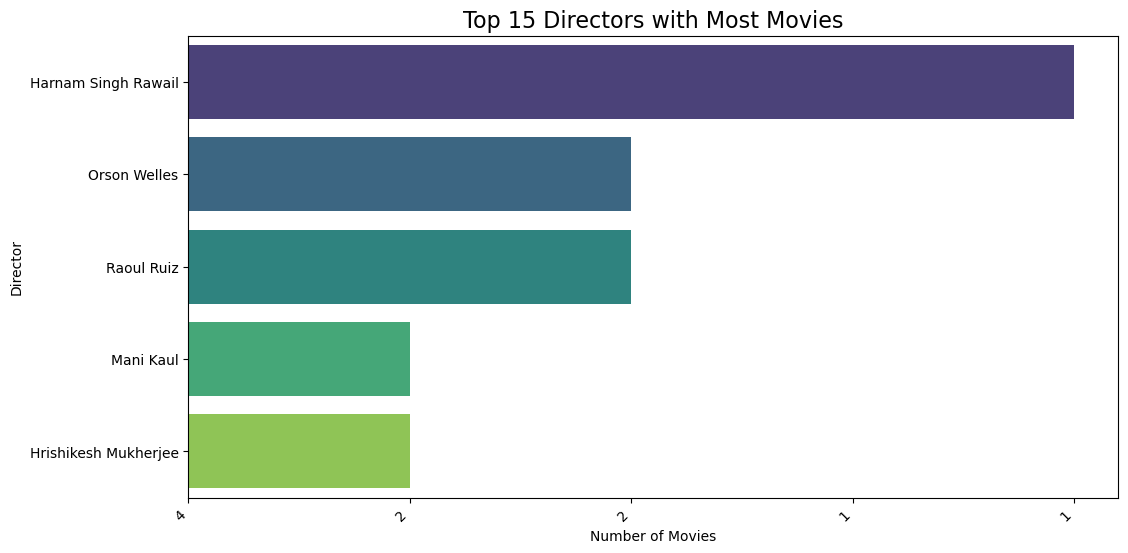

In [82]:
# Count number of movies per director
director_counts = result['director_name'].value_counts().reset_index()
director_counts.columns = ['director_name', 'movie_count']

# Plot top 15 directors
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=director_counts.head(15),
    x='movie_count', 
    y='director_name',
    hue='director_name',  # Assign the 'y' variable to hue
    palette='viridis',

)

ax.set_xticks(range(len(director_counts.head(15))))
ax.set_xticklabels(director_counts.head(15)['movie_count'], rotation=45, ha='right')
plt.title('Top 15 Directors with Most Movies', fontsize=16)
plt.xlabel('Number of Movies')
plt.ylabel('Director')

plt.show()

### iii. Loading the rotten tomato dataset

In [83]:
# Load the dataset
rt = {}

# Now load the data into rt['movie_info']
rt['movie_info'] = pd.read_csv(
    os.path.join(data_folder, "rt.movie_info.tsv"),
    encoding='utf-8',
    sep='\t'  # For TSV format
)
rt['movie_info']

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [84]:
rt['movie_info'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [85]:
rt['movie_info'].describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [86]:
rt['movie_info'].isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [87]:
#dropping and fill null/missing values
rt['movie_info'] = rt['movie_info'].fillna({
    'synopsis': 'Unknown',  
    'rating': 0,           
    'genre': 'Unknown',     
    'director': 'Unknown',  
    'writer': 'Unknown',    
    'theater_date': 'Unknown', 
    'dvd_date': 'Unknown',
    'currency': 'Unknown',
    'box_office': 0,        
    'runtime': 0,           
    'studio': 'Unknown'
})

rt['movie_info'].isnull().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [88]:
rt['movie_info'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1555    False
1556    False
1557    False
1558    False
1559    False
Length: 1560, dtype: bool

In [89]:
# Drop rows where  'genre' is missing
rt['movie_info'] = rt['movie_info'].dropna(subset=[ 'genre'])